# **透過SVD的目光：圖像壓縮和還原的技術巧思**


---


## 專案前言：

圖像壓縮和還原技術在現代數據處理和儲存中起著重要作用。隨著大量數位圖像和視頻的生成和分享，我們需要有效的方法來減少數據的儲存和傳輸成本，同時又能保持圖像品質。奇異值分解（SVD）是一種常用的數學方法，可用於實現圖像壓縮。本專案旨在探討和實施SVD的 "Rank q approximation" 技術，以實現圖像壓縮，同時保持足夠的圖像品質。

## 專案目標簡介：

本專案的主要目標是研究和實施圖像壓縮和還原技術，尤其是基於奇異值分解（SVD）的 "Rank q approximation" 方法。以下是我們的專案目標簡介：

1. **圖像壓縮和品質比較：**
   - 通過實施SVD的 "Rank q approximation" 技術，比較不同的q值對圖像的壓縮效果。
   - 評估壓縮後的圖像品質，找出最佳的q值。

2. **觀察手寫數字影像：**
   - 使用手寫數字數據集，實現隨機選擇和顯示手寫數字影像的功能。
   - 編寫程式碼，使每次執行都能觀看不同的手寫數字影像，以熟悉數據。

3. **計算壓縮倍數和顯示壓縮圖像：**
   - 計算SVD的 "Rank q approximation" 方法對圖像的壓縮倍數。
   - 顯示原始圖像和壓縮後的圖像，以直觀比較壓縮效果。

4. **圖像加密和解密：**
   - 選擇不同類型的五張圖像，包括人臉、水果、風景等。
   - 使用SVD和 "Rank q approximation" 方法對圖像進行壓縮（加密），然後解密。
   - 觀察解密後的圖像效果，並評估人臉和非人臉圖像的解密能力。

通過實現這些目標，我們將深入瞭解SVD在圖像處理中的應用，並研究圖像壓縮和還原技術的實際效能。這項專案將有助於我們更好地理解數據壓縮、圖像處理和圖像安全性方面的核心概念。


---







# **導入初步套件**

In [ ]:
%shell
jupyter nbconvert --to html /content/D2.ipynb


SyntaxError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import svd
import matplotlib.image as mpimg

In [ ]:
# fontparams = {'font.size': 13, 'font.weight':'bold',
'font.family':'arial', 'font.style':'italic'}
# plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold',
               'family':'serif', 'style':'italic'}

## **習題 1：將一張圖像 X 利用 SVD 的 “Rank q approximation‘，能達到壓縮的目的並保持圖像的品質。比較下列幾種對於圖像矩陣 X 的重組安排，並進行 “Rank q approximation‘，在同樣的壓縮比之下，觀察還原後的圖像品質哪個最好？能說出理由嗎？**


1.   X 不變
2.   將 X 以 $8\times 8$ 小圖（patch）進行切割，再將每個小圖拉成 $64\times 1$ 的向量，最後重組這些向量並排成新的 $64\times N$ 矩陣。
3. 同上，小圖大小為  $16 \times 16$ /per patch。
4. 同上，但分割成  $32\times 32/$ per patch。
5. 其他。譬如，隨機挖取 X 裡面的 patch，可重疊，小圖大小自訂、數量隨意。


---



這道習題要求比較不同的重組安排對於圖像壓縮的影響。我們可以先定義一個函數，將圖像 X 分割成不同大小的小圖，並返回相應的矩陣。然後對每個矩陣進行 SVD，得到其前 q 個奇異值和相應的左右奇異向量。根據這些向量，可以使用下列公式進行 “Rank q approximation‘： $X_q = U_q\Sigma_q V_q^T$

其中，$U_q$ 是 $m\times q$ 的左奇異矩陣，$\Sigma_q$ 是 $q\times q$ 的奇異值矩陣，$V_q$ 是 $n\times q$ 的右奇異矩陣。$X_q$ 是重組後的圖像矩陣。



## **1-1.   X 不變**

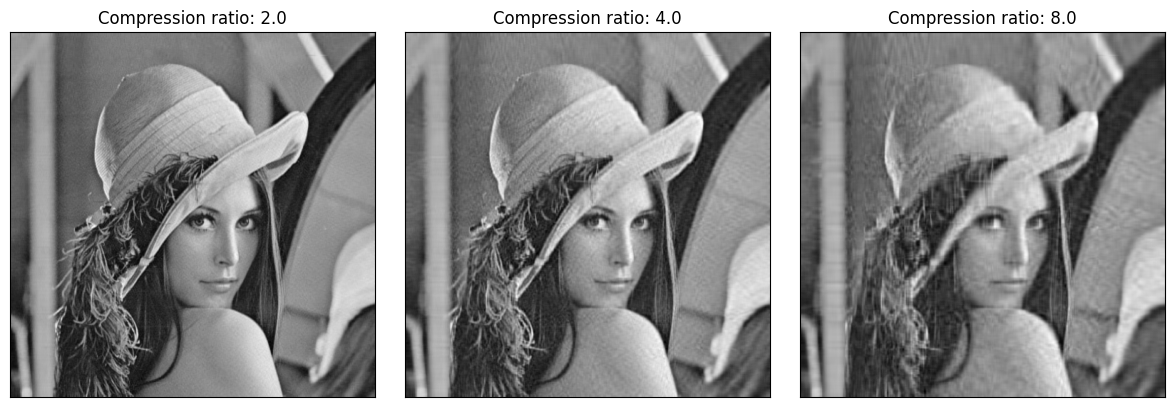

In [ ]:
imgfile = '/content/drive/MyDrive/淺度機器學習/lenna.png'
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
N, p = X.shape

U, E, VT = svd(X, full_matrices = False)
q = np.array([p/4, p/8, p/16]).astype('int')

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
    ax[i].imshow(Xq, cmap = 'gray')
    ax[i].set_title('Compression ratio: {}'.format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()

當q值設定為p/4時，壓縮比例為2，重建圖片與原圖相比差異不大，仍然能保留許多細節和清晰度。然而，當q值分別設定為p/8和p/16時，壓縮比例分別為4和8，重建圖片的質量明顯下降，圖像細節和清晰度都有所損失。

---



以下程式碼是一個簡單的圖像處理示例，它的作用是將一張圖片分為多個 64x64 大小的小區域，並以矩形標示出每個小區域的位置和位置信息，最後顯示其中一個小區域 座標 (4,4) 的內容。

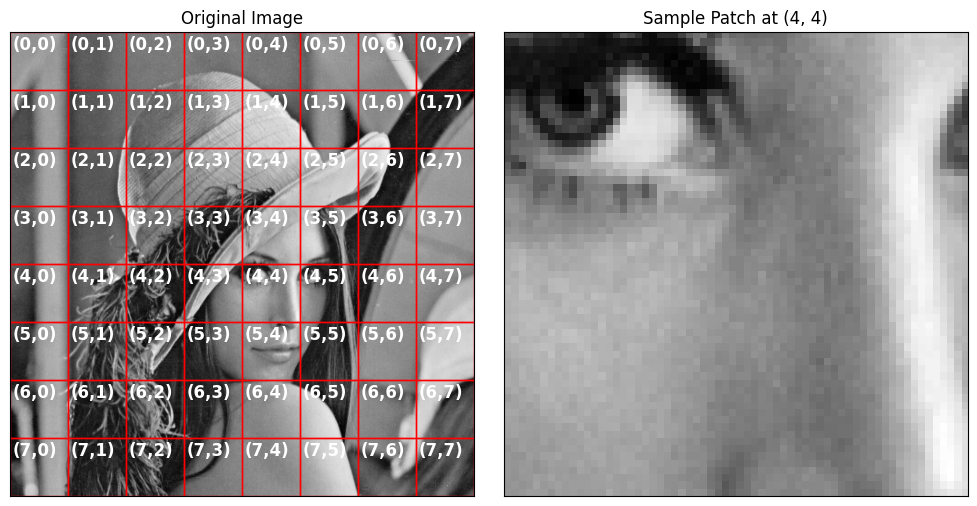

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import skimage.util as skutil

imgfile = '/content/drive/MyDrive/淺度機器學習/lenna.png'
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2)

# 將圖像分為 16x16 的小區域
patches = skutil.view_as_windows(X, (64, 64), step=64)

# 顯示原始圖像和切割後的小區域
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X, cmap='gray')
ax[0].set_title('Original Image')
ax[0].set_xticks([])
ax[0].set_yticks([])

# 繪製矩形標示出小圖的位置，並標示出位置信息
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        x1 = j * 64
        y1 = i * 64
        rect = plt.Rectangle((x1, y1), 64, 64,
                             edgecolor='r', facecolor='none')
        ax[0].add_patch(rect)
        ax[0].text(x1+2, y1+19, f'({i},{j})',
                   color='w', fontsize=12, fontweight='bold')


# 顯示其中一個小區域
ax[1].imshow(patches[4, 4], cmap='gray')
ax[1].set_title('Sample Patch at (4, 4)' )
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()
plt.show()


以下是程式碼中值得介紹的部分：

*   第12行：使用 skutil.view_as_windows() 函式將圖像分割成大小為64x64的小區域。這個函式可以簡化程式碼，減少迴圈的使用，使得程式更加整潔。

*   第22-28行：使用 plt.Rectangle() 函式在原圖上繪製紅色的矩形標示出每個小區域的位置。

*   第32-35行：這段程式碼可以透過更改座標來放大查看指定區域。右邊的圖像展示了其中一個小區域，由許多小正方形組成，每個小區域都是一個64x64的矩形。




---




## **1-2.   將 X 以 $8\times 8$ 小圖（patch）進行切割，再將每個小圖拉成 $64\times 1$ 的向量，最後重組這些向量並排成新的 $64\times N$ 矩陣。**

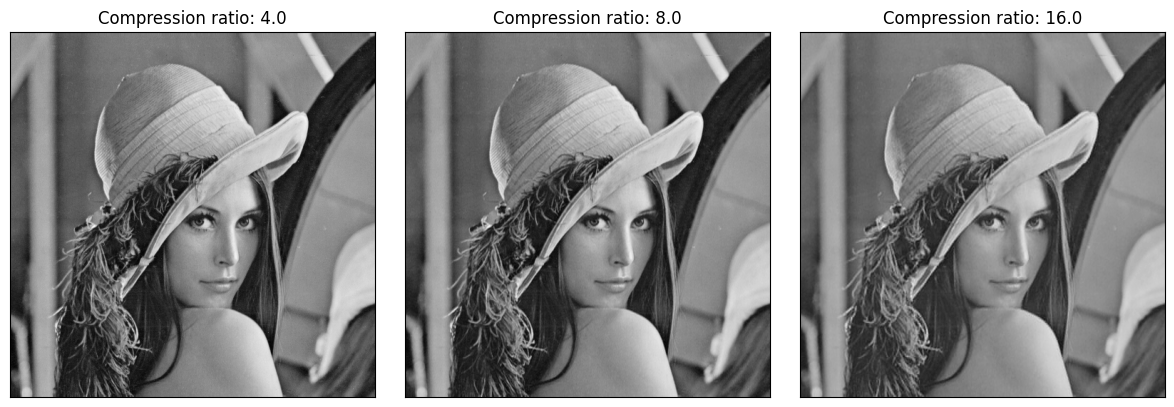

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy.linalg import svd

# 載入圖像並轉換為灰白圖
imgfile = '/content/drive/MyDrive/淺度機器學習/lenna.png'
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2)

N, p = X.shape

# 切割圖像成為 8x8 的小圖
patches = []
for i in range(64):
    for j in range(64):
        patch = X[i*8:(i+1)*8, j*8:(j+1)*8]
        patches.append(patch)

# 將每個小圖轉換成 64x1 的向量，再將它們組成一個 64x4096 的矩陣
X_blocks = np.array([patch.flatten() for patch in patches]).T

# 計算 SVD
U, E, VT = svd(X_blocks, full_matrices=False)

# 定義 q 值
q_vals = np.array([p/8, p/16, p/32]).astype('int')


# 繪製每個 q 值的近似圖像
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, q in enumerate(q_vals):
    # 計算 Rank-q 近似
    Xq = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]

    # 將近似圖像轉換回 8x8 的小圖
    approx_patches = [Xq[:, i].reshape(8, 8) for i in range(Xq.shape[1])]

    # 將小圖重新組合成圖像(採用 np.vstack 以及 np.hstack 組回原本的圖像大小 512X512)
    approx_image = np.vstack([np.hstack([approx_patches[j*64+i]
                                         for i in range(64)]) for j in range(64)])

    # 繪製近似圖像
    ax[i].imshow(approx_image, cmap='gray')
    ax[i].set_title('Compression ratio: {}'.format(p/q/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()

這段程式碼展示將圖像切割成許多 8x8 的小圖，並將每個小圖轉換為 64x1 的向量，最終組成一個 64x4096 的矩陣。接下來，對這個矩陣進行 SVD，得到左奇異矩陣 U，奇異值矩陣 E 和右奇異矩陣 VT。

對於每個 q 值，計算其對應的 Rank-q 近似圖像。具體來說，我們只保留 U 的前 q 列，E 的前 q 個對角元素，和 VT 的前 q 行，然後將它們相乘，得到一個 64x4096 的矩陣 Xq，然後再將 Xq 轉換回 8x8 的小圖，最後將小圖重新組合成圖像。

從觀察結果可以看出，在這個例子中，使用三個不同的壓縮倍數進行圖像壓縮後，壓縮後的圖像品質相似，並且仍然可以清晰地辨認圖像細節。


---


以下是程式碼中值得介紹的部分：


*   第15-19行：將原始圖像 X 切割成 $64\times64$ 個 $8\times8$ 的小圖，並將每個小圖存儲在 patches 列表中。其中，第一個迴圈遍歷圖像的垂直方向，第二個迴圈遍歷圖像的水平方向。

*   第37-41行：這段程式碼將壓縮後的圖像 Xq 中的每個向量重新 reshape 成 $8\times8$ 的小圖，存儲在 approx_patches 列表中。然後，將 approx_patches 列表中的所有小圖重新組合成一個大圖像 approx_image，採用 np.vstack 和 np.hstack 函數組合圖像，以恢復原始圖像的大小，即 $512\times512$。

---



## **1-3. 同上，小圖大小為  $16 \times 16$ /per patch**

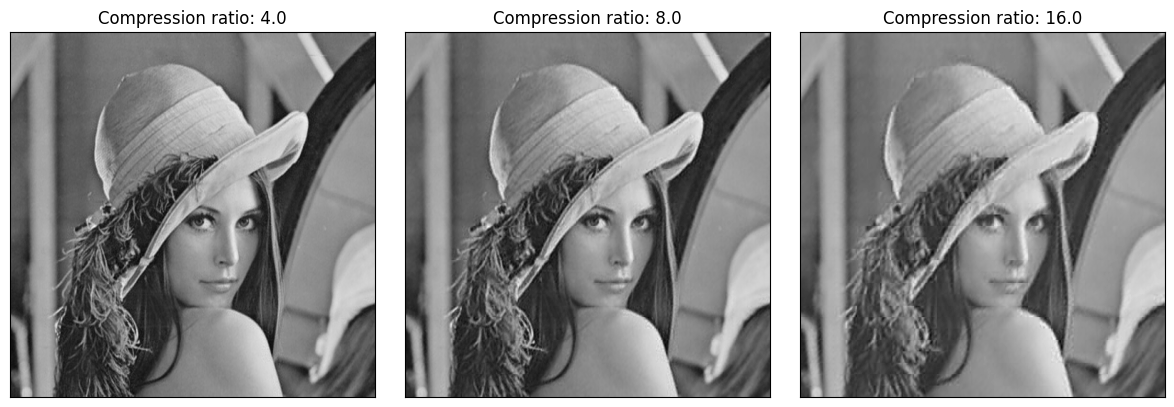

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy.linalg import svd

# 載入圖像並轉換為灰白圖
imgfile = '/content/drive/MyDrive/淺度機器學習/lenna.png'
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2)

N, p = X.shape

# 切割圖像成為 16x16 的小圖
patches = []
for i in range(32):
    for j in range(32):
        patch = X[i*16:(i+1)*16, j*16:(j+1)*16]
        patches.append(patch)

# 將每個小圖轉換成 256x1 的向量，再將它們組成一個 256x1024 的矩陣
X_blocks = np.array([patch.flatten() for patch in patches]).T

# 計算 SVD
U, E, VT = svd(X_blocks, full_matrices=False)

# 定義 q 值
q_vals = np.array([p/8, p/16, p/32]).astype('int')


# 繪製每個 q 值的近似圖像
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, q in enumerate(q_vals):
    # 計算 Rank-q 近似
    Xq = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]

    # 將近似圖像轉換回 16x16 的小圖
    approx_patches = [Xq[:, i].reshape(16, 16) for i in range(Xq.shape[1])]

    # 將小圖重新組合成圖像 (採用 np.block 組回原本的圖像大小 512X512)
    approx_image = np.block([[approx_patches[j*32+i]
                              for i in range(32)] for j in range(32)])

    # 繪製近似圖像
    ax[i].imshow(approx_image, cmap='gray')
    ax[i].set_title('Compression ratio: {}'.format(p/q/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()

透過觀察此例的結果，可以發現當小圖大小為 16x16 時，若壓縮倍數為 16 時，圖片開始變模糊了，表示在此情況下，此壓縮率已經對圖像品質產生較明顯的影響。


---



## **1-4. 同上，小圖大小為 $32 \times 32$ /per patch**

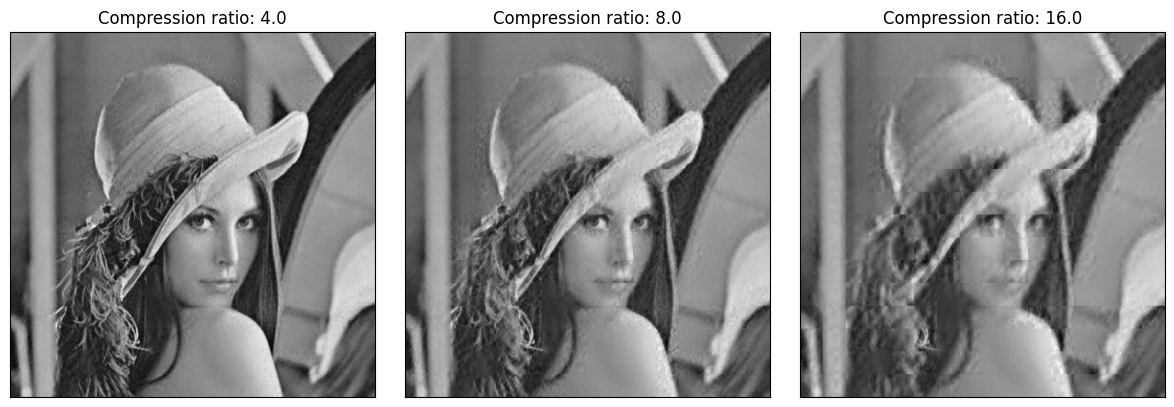

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy.linalg import svd

# 載入圖像並轉換為灰白圖
imgfile = '/content/drive/MyDrive/淺度機器學習/lenna.png'
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2)

N, p = X.shape

# 切割圖像成為 32x32 的小圖
patches = []
for i in range(16):
    for j in range(16):
        patch = X[i*32:(i+1)*32, j*32:(j+1)*32]
        patches.append(patch)

# 將每個小圖轉換成 1024x1 的向量，再將它們組成一個 1024x256 的矩陣
X_blocks = np.array([patch.flatten() for patch in patches]).T

# 計算 SVD
U, E, VT = svd(X_blocks, full_matrices=False)

# 定義 q 值
q_vals = np.array([p/8, p/16, p/32]).astype('int')


# 繪製每個 q 值的近似圖像
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, q in enumerate(q_vals):
    # 計算 Rank-q 近似
    Xq = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]

    # 將近似圖像轉換回 32x32 的小圖
    approx_patches = [Xq[:, i].reshape(32, 32) for i in range(Xq.shape[1])]

    # 將小圖重新組合成圖像
    approx_image = np.block([[approx_patches[j*16+i]
                              for i in range(16)] for j in range(16)])

    # 繪製近似圖像
    ax[i].imshow(approx_image, cmap='gray')
    ax[i].set_title('Compression ratio: {}'.format(p/q/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()


透過觀察此例的結果，可以發現當小圖大小為 32x32 時，若壓縮倍數為 8 或 16 時，圖片都開始變模糊了，表示在此情況下，這些壓縮率已經對圖像品質產生較明顯的影響。

---



## **1-5. 使用相同 SVD Rank-q 值比較三種小圖大小的影像降維效果**

固定 Rank-q 的情況下，一次比較三種不同大小的小圖可以更清晰地顯示它們之間的異同，有助於我們更深入地了解它們對影像降維的影響。

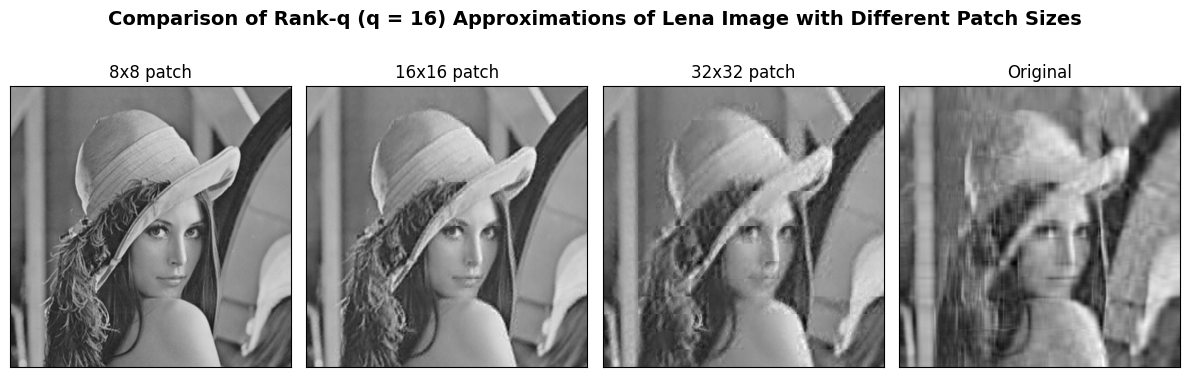

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy.linalg import svd
import skimage.util as skutil

# 載入圖像並轉換為灰白圖
imgfile = '/content/drive/MyDrive/淺度機器學習/lenna.png'
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2)

N, p = X.shape

# 定義不同的小圖大小
patch_sizes = [(8, 8), (16, 16), (32, 32)]

# 設定 q 值
q = p // 32

# 繪製每個小圖大小的近似圖像
fig, ax = plt.subplots(1, len(patch_sizes)+1, figsize=(12, 4))
for i, patch_size in enumerate(patch_sizes):
    # 將圖像分為指定大小的小區域
    patches = skutil.view_as_windows(X, patch_size, step=patch_size[0])

    patches = patches.reshape((-1, patch_size[0] * patch_size[1])).T

    # 計算 SVD
    U, E, VT = svd(patches, full_matrices=False)

    # 計算 Rank-q 近似
    Xq = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]

    # 將近似圖像轉換回原本大小的小圖
    approx_patches = [Xq[:, i].reshape(patch_size) for i in range(Xq.shape[1])]

    # 將小圖重新組合成圖像
    approx_image = np.block([[approx_patches[j*(p // patch_size[0])+i]
                              for i in range(p // patch_size[0])] for
                             j in range(p // patch_size[1])])


    # 繪製近似圖像
    ax[i].imshow(approx_image, cmap='gray')
    ax[i].set_title('{}x{} patch'.format(patch_size[0], patch_size[1]))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

#####Original######
U, E, VT = svd(X, full_matrices = False)
i = 3
Xq = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]
ax[i].imshow(Xq, cmap = 'gray')
ax[i].set_title('Original')
ax[i].set_xticks([])
ax[i].set_yticks([])

fig.suptitle('Comparison of Rank-q (q = 16) Approximations of Lena Image with Different Patch Sizes', y=1.0 ,fontsize=14, fontweight='bold' )
plt.tight_layout()
plt.show()

從結果可以看出，用小的小圖大小（8x8）會產生更好的近似圖像，因為它能夠更有效地捕捉圖像的局部細節。隨著小圖大小的增加（ 16x16 和 32x32 ），近似圖像的細節逐漸減少，但整體還是能夠保留圖像的主要特徵。總之，以上三種使用不同小圖大小的方法都能夠產生比不切小圖更好的近似圖像。

值得注意的是，雖然使用較小的小圖大小可以產生更好的近似圖像，但也意味著需要更多的小圖來重新組合成完整的圖像。這可能會增加運行時間，因為需要計算更多的 SVD 和矩陣乘法。


---



## **1-6. 使用相異 SVD Rank-q 值比較三種小圖大小的影像降維效果**

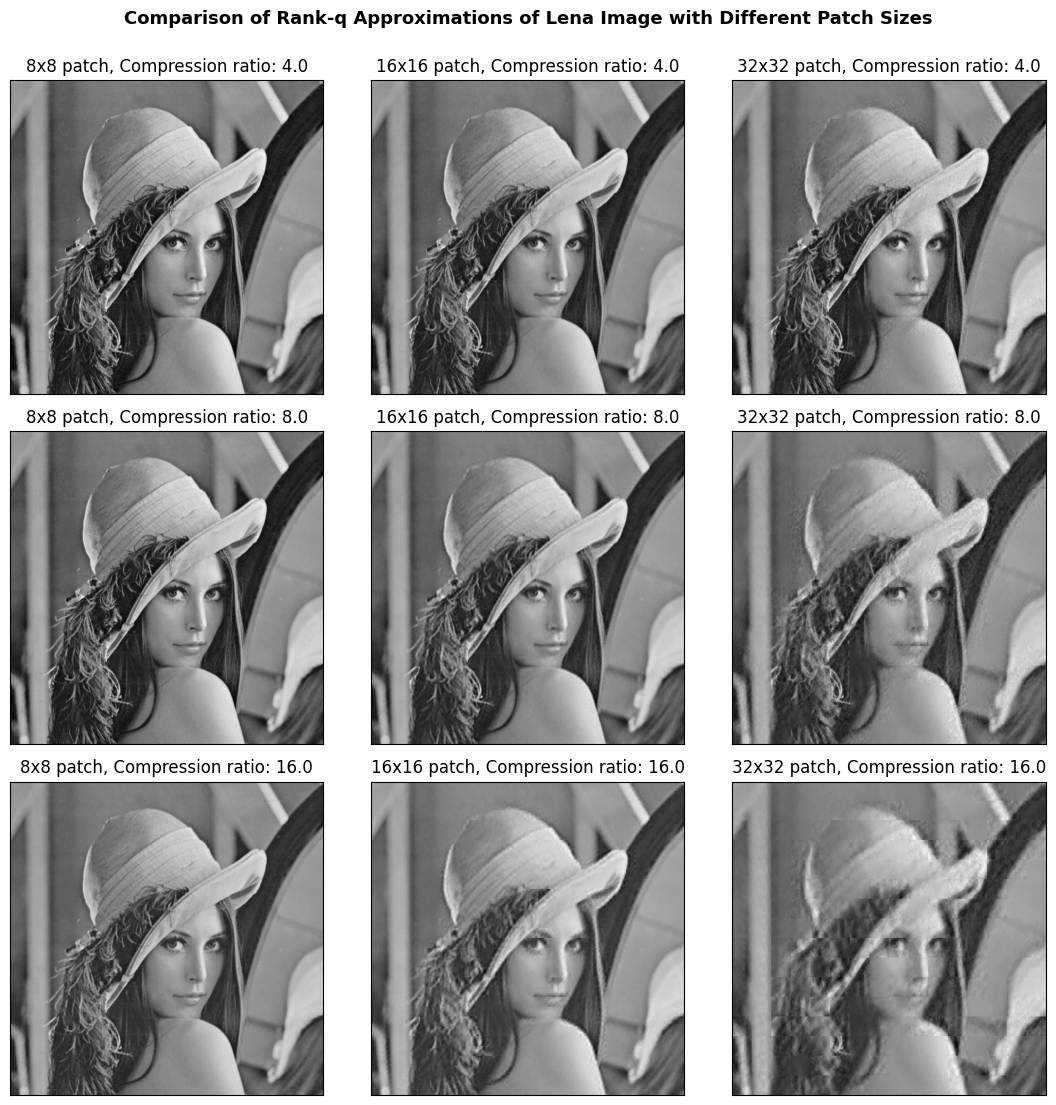

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy.linalg import svd
import skimage.util as skutil

# 載入圖像並轉換為灰白圖
imgfile = '/content/drive/MyDrive/淺度機器學習/lenna.png'
X = mpimg.imread(imgfile)
if len(X.shape) > 2:
    X = np.mean(X, axis=2)

N, p = X.shape

# 定義不同的小圖大小
patch_sizes = [(8, 8), (16, 16), (32, 32)]

# 設定不同的 q 值
q_vals = np.array([p/8, p/16, p/32]).astype('int')

# 繪製每個小圖大小和 q 值的近似圖像
fig, ax = plt.subplots(len(q_vals), len(patch_sizes), figsize=(11, 11))
for i, q in enumerate(q_vals):
    for j, patch_size in enumerate(patch_sizes):
        # 將圖像分為指定大小的小區域
        patches = skutil.view_as_windows(X, patch_size, step=patch_size[0])
        # 重新整理形狀以便後續處理
        patches = patches.reshape((-1, patch_size[0] * patch_size[1])).T

        # 計算 SVD
        U, E, VT = svd(patches, full_matrices=False)

        # 計算 Rank-q 近似
        Xq = U[:, :q] @ np.diag(E[:q]) @ VT[:q, :]

        # 將近似圖像轉換回原本大小的小圖
        approx_patches = [Xq[:, i].reshape(patch_size) for i in range(Xq.shape[1])]

        # 將小圖重新組合成圖像
        approx_image = np.block([[approx_patches[j*(p // patch_size[0])+i]
                                  for i in range(p // patch_size[0])]
                                 for j in range(p // patch_size[1])])

        # 繪製近似圖像
        ax[i, j].imshow(approx_image, cmap='gray')
        ax[i, j].set_title('{}x{} patch, Compression ratio: {}'.
                           format(patch_size[0], patch_size[1], p/q/2))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
fig.suptitle('Comparison of Rank-q Approximations of Lena Image
with Different Patch Sizes', y=1.0 ,fontweight='bold',fontsize =13)
plt.tight_layout()
plt.show()



1.
小圖大小 8x8, q 值為 p/8:
這個設定下，使用了最小的小圖大小，且 q 值也是最大的，因此能夠更精確地捕捉圖像的局部細節，所以生成的近似圖像質量最高。然而，由於 q 值較大，所以也需要較長的計算時間。

2. 小圖大小 16x16, q 值為 p/16:
在這個設定下，使用的小圖大小和 q 值都比上一個設定要小，因此生成的近似圖像會稍微失去一些細節，但整體仍能夠保留圖像的主要特徵。這個設定下的計算時間也會比第一個設定短一些。
3. 小圖大小 32x32, q 值為 p/32:
在這個設定下，使用最大的小圖大小，且 q 值也最小，因此生成的近似圖像會失去更多的細節，但仍然能夠辨認圖像的主要特徵。這個設定下計算時間最短。

總體而言，隨著小圖大小的增加，近似圖像的細節逐漸減少，但整體還是能夠保留圖像的主要特徵。隨著 q 值的減少，近似圖像的細節會更多地丟失，但計算時間也會減少。根據需要，可以選擇不同的小圖大小和 q 值來平衡圖像質量和計算時間。

---






## **習題 2：處理大量影像前，有必要觀看影像圖，以確定能掌握將要處理的影像及其資料型態。以 70000 張手寫圖像為例，每個數字約 7000 字，需要寫一段程式碼來觀察這些手寫數字的影像與品質，且每次執行都能隨機觀看到不同的影像。**

---



## **套件讀取**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## **匯入 MNIST 資料集，其中包含手寫數字的影像資料。**

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', parser = 'auto', \
return_X_y = True)
X = X.T

## **嘗試讀取資料集中的第一張影像。**

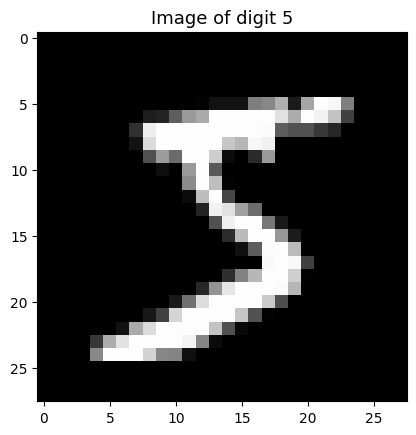

In [ ]:
i = 0
img = X.iloc[:, i]
sz = np.sqrt(len(img)).astype('int')
plt.imshow(np.array(img).reshape(sz, sz), cmap='gray')
plt.title(f"Image of digit 5", fontsize = 13)
plt.show()

其中 'sz = np.sqrt(len(img)).astype('int')' 計算每張影像的邊長 sz，這裡假設每張影像都是正方形，所以 sz 的值是向量的長度開根號後取整數。



## **Montage函式 ：將多張數字圖像拼接成一個大的「蒙太奇」圖像。**

(引用自 SML/Lesson 6: 淺度機器學習：PCA 、SVD 及其在影像處理的應用 汪群超 Chun-Chao Wang 老師)

In [ ]:
def montage(A, m, n):
    '''
    Create a montage matrix with mn images
    Inputs:
    A: original pxN image matrix with N images (p pixels), N > mn
    m, n: m rows & n columns, total mn images
    Output:
    M: montage matrix containing mn images
    '''
    sz = np.sqrt(A.shape[0]).astype('int') # image size sz x sz
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m):
        for j in range(n):
            M[i*sz:(i+1)*sz, j*sz:(j+1)*sz] = \
                A[:, i*n+j].reshape(sz, sz)
    return M


## **繪製多張特定數字的蒙太奇圖像**

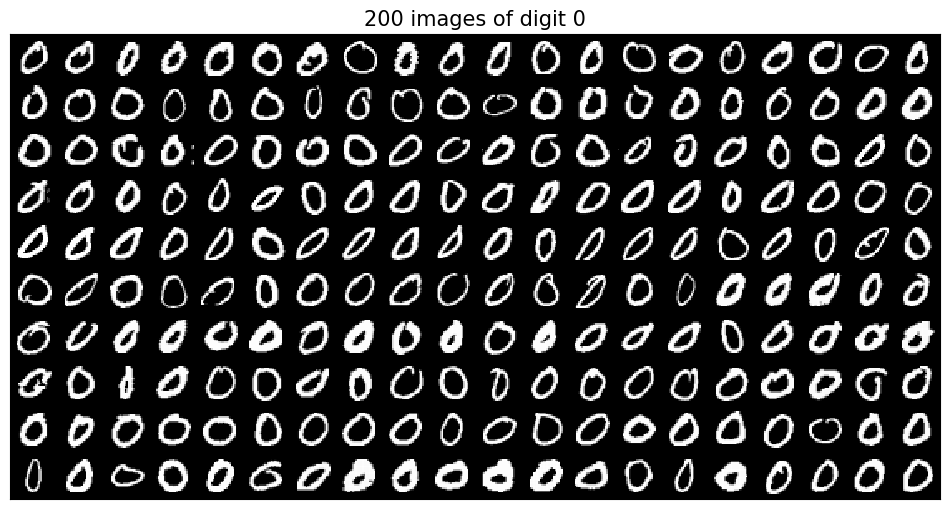

In [ ]:
digit_to_show = '0'
idx = y[y==digit_to_show].index
Digit = X.iloc[:, idx]
plt.figure(figsize = (12, 12))
m, n = 10, 20 # A m x n montage (total mn images)
M = montage(np.array(Digit), m, n)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title(f"{m*n} images of digit {digit_to_show}", fontsize = 15)
plt.show()

## **繪製多張特定數字的隨機蒙太奇圖像**

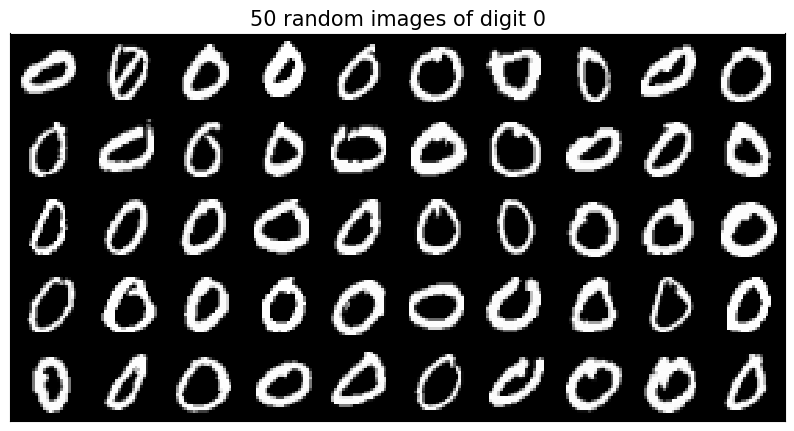

In [ ]:
digit_to_show = '0'
idx = np.random.choice(y[y==digit_to_show].index, size=50, replace=False)
# 隨機選擇50個該數字的索引
Digit = X.iloc[:, idx]
plt.figure(figsize = (10, 10))
m, n = 5, 10 # A m x n montage (total mn images)
M = montage(np.array(Digit), m, n)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title(f"{m*n} random images of digit {digit_to_show}", fontsize = 15)
plt.show()

此程式碼與前一個類似，僅修改 idx = y[y==digit_to_show].index 為 idx = np.random.choice(y[y==digit_to_show].index, size=50, replace=False)。

這代表它會在 y 中等於 digit_to_show 的索引中隨機選擇50個索引，並且不會重複選擇。


---



## **繪製多張數字0~9的隨機蒙太奇圖像**

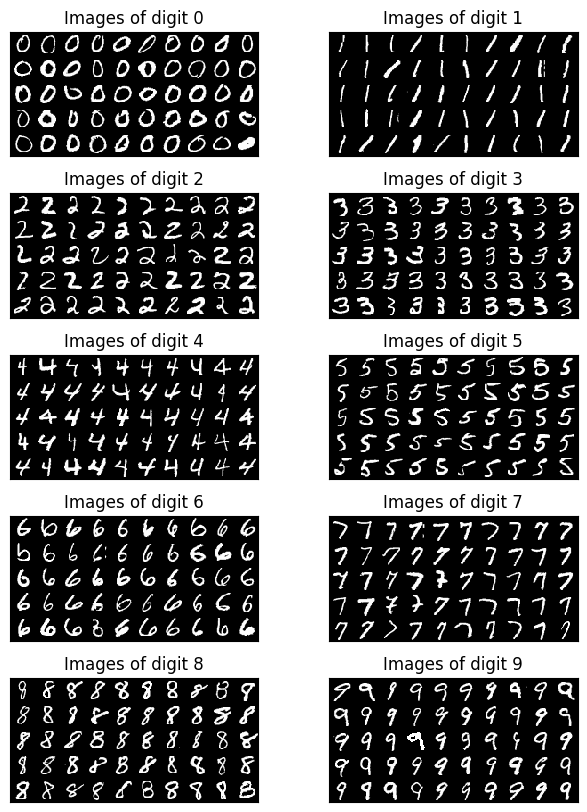

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    digit_to_show = str(i)
    idx = np.random.choice(y[y==digit_to_show].index, size=50, replace=False)
    # 隨機選擇50個該數字的索引
    Digit = X.iloc[:, idx]
    m, n = 5, 10 # A m x n montage (total mn images)
    M = montage(np.array(Digit), m, n)
    plt.subplot(5, 2, i+1)
    plt.imshow(M, cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Images of digit {digit_to_show}")
plt.subplots_adjust(hspace=0.3, wspace=-0.3)
plt.show()



---



## **習題 三：每張大小 28×28 的手寫數字圖像 70000 張，不經壓縮前的儲存空間為 54.88 M Bytes。若進行 SVD 的 “Rank q approximation”，則壓縮倍數由 q 決定。寫一支程式，當調整 q 值時，可以算出壓縮的倍數，並同時顯示原圖與壓縮後還原的圖各 100 張做為比較（任選 100 張）。**

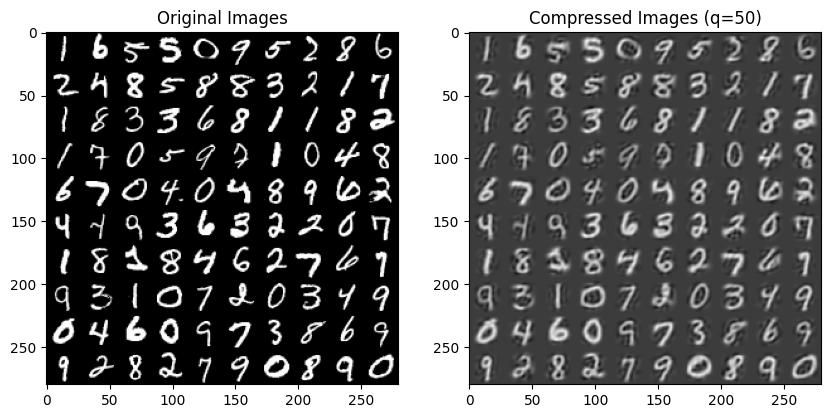

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

mnist = loadmat('/content/drive/MyDrive/淺度機器學習/mnist-original.mat')
X = mnist['data']
y = mnist['label'][0]

# 進行 SVD 壓縮
q = 50 # 設定壓縮後保留的前 q 個奇異值
U, s, V_T = np.linalg.svd(X, full_matrices=False)
S = np.diag(s[:q])
U_q = U[:, :q]
V_T_q = V_T[:q, :]
X_T_q = U_q @ S @ V_T_q

# 隨機選取 100 張圖進行壓縮與比較
indices = np.random.choice(range(X.shape[1]), size=100, replace=False)
original_images = X[:, indices]
compressed_images = X_T_q[:, indices]

# 將原始圖像與壓縮圖像排列成左右兩張子圖
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(montage(original_images, 10, 10), cmap='gray')
axs[0].set_title('Original Images')
axs[1].imshow(montage(compressed_images, 10, 10), cmap='gray')
axs[1].set_title(f'Compressed Images (q={q})')
plt.show()

這個程式展示了如何使用奇異值分解(SVD)來進行圖像壓縮。在程式中，我們使用了MNIST手寫數字資料集，先進行SVD壓縮，然後隨機選取100張圖像進行壓縮與還原，比較原始圖像與壓縮圖像的差異。


---



## **使用SVD進行MNIST圖像壓縮與比較：保留前50個奇異值**

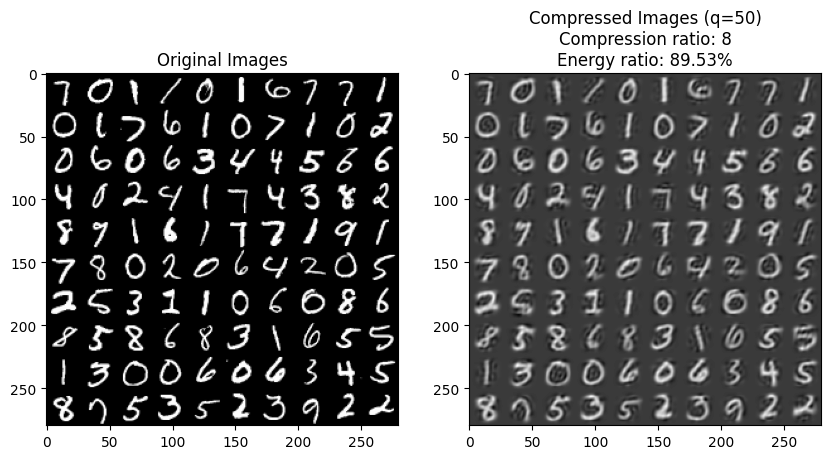

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


def compress_images(X, q):
    """對矩陣X進行SVD壓縮，保留前q個奇異值"""
    U, s, V_T = np.linalg.svd(X, full_matrices=False)
    S = np.diag(s[:q])
    U_q = U[:, :q]
    V_T_q = V_T[:q, :]
    X_T_q = U_q @ S @ V_T_q
    total_energy = np.sum(s ** 2)
    energy_ratio = np.sum(s[:q] ** 2) / total_energy
    return X_T_q, energy_ratio


# 載入MNIST數據集
mnist = loadmat('/content/drive/MyDrive/淺度機器學習/mnist-original.mat')
X = mnist['data']
y = mnist['label'][0]
original_size = 784
q = 50

# 對矩陣X進行SVD壓縮
X_T_q, energy_ratio= compress_images(X, q)

# 隨機選取100張圖進行壓縮與比較
indices = np.random.choice(range(X.shape[1]), size=100, replace=False)
original_images = X[:, indices]
compressed_images = X_T_q[:, indices]

# 將原始圖像與壓縮圖像排列成左右兩張子圖
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(montage(original_images, 10, 10), cmap='gray')
axs[0].set_title('Original Images')
axs[1].imshow(montage(compressed_images, 10, 10), cmap='gray')
axs[1].set_title(f'Compressed Images (q={q})\nCompression ratio:
{original_size/q/2:.0f}\nEnergy ratio: {energy_ratio:.2%}')
plt.show()


假設有一個 $m\times n$ 的矩陣 $A$，其奇異值分解為 $A = U\Sigma V^T$ ，我們可以用奇異值來計算矩陣 A 的能量佔比。假設矩陣 A 的前 q 個奇異值分別為 σ1, σ2, ..., σq，
則矩陣 A 的能量佔比可以計算為 (前 q 個奇異值的平方和) / (所有奇異值的平方和)
計算公式如下：

奇異值計算能量佔比的數學公式
$$
\frac{\sum_{i=1}^q \sigma_i^2}{\sum_{i=1}^{\min(m,n)}\sigma_i^2}
$$




---



當我們將 q 設為 50 時，可以將原始圖像進行壓縮。在本例中，壓縮倍數約為 8，表示我們可以將圖像的大小縮小到原來的 8 倍。同時，根據奇異值分解的結果，我們可以發現這些前 q 個奇異值可以解釋圖像的能量占比為 89.53%。因此，我們可以在保留圖像主要特徵的前提下，將圖像的大小大幅度縮小。

---



## **探索不同奇異值數量對MNIST圖像壓縮的影響**

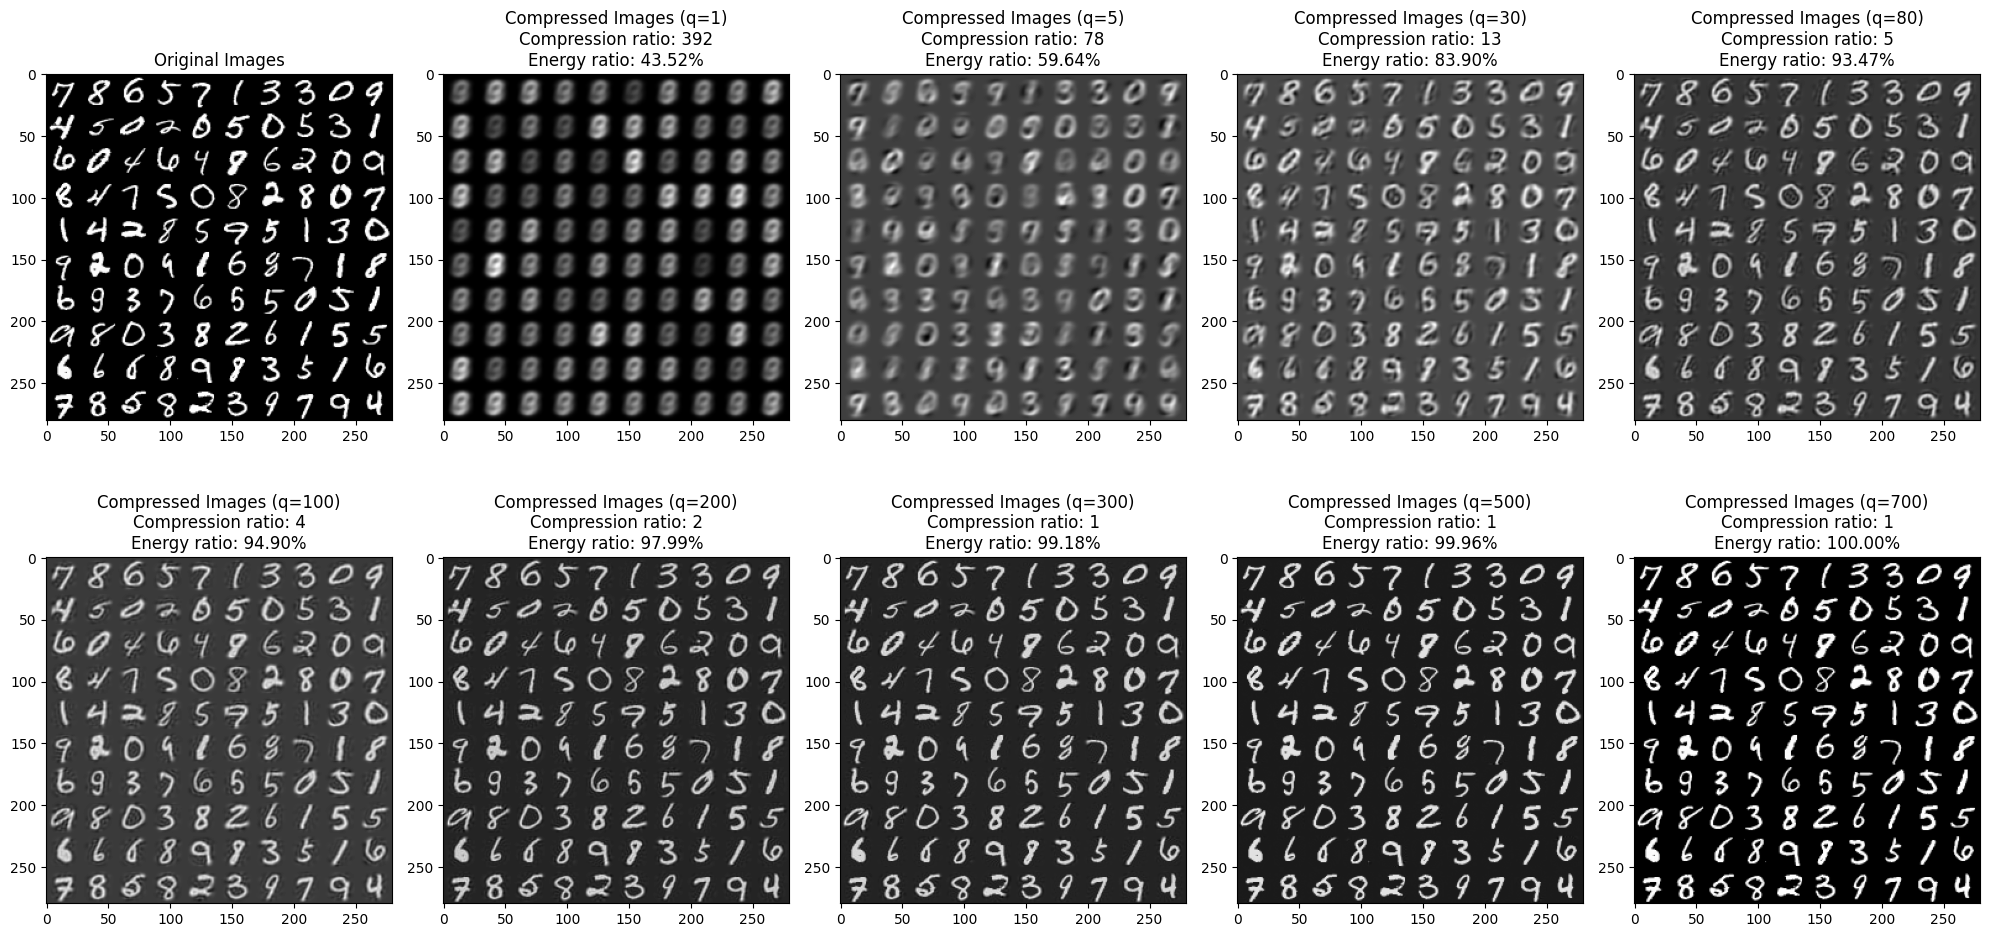

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

q_values = [1, 5 , 30, 80, 100, 200, 300, 500, 700]
# Loop through the rest of the subplots and plot compressed images
for i, q in enumerate(q_values):
    # 對全局變量X進行SVD壓縮
    X_T_q, energy_ratio = compress_images(q)

    # 隨機選取100張圖進行壓縮與比較
    np.random.seed(42)
    indices = np.random.choice(range(X.shape[1]), size=100, replace=False)
    compressed_images = X_T_q[:, indices]

    # 將原始圖像與壓縮圖像排列成左右兩張子圖
    row = (i+1) // 5
    col = (i+1) % 5
    compressed_ax = axs[row][col]
    compressed_ax.imshow(montage(compressed_images, 10, 10), cmap='gray')
    compressed_ax.set_title(f'Compressed Images (q={q})\nCompression ratio:
    {original_size/q/2:.0f}\nEnergy ratio: {energy_ratio:.2%}')
axs[0][0].imshow(montage(original_images, 10, 10), cmap='gray')
axs[0][0].set_title('Original Images')
plt.tight_layout()
plt.show()

對於每個q值，我們隨機選取了100個數字圖像進行壓縮和比較。結果表明，隨著q值的增加，壓縮後的數字圖像品質得到了提高。此外，我們還觀察到，每個q值對應的能量佔比也不同，當q值為30時，已經達到了83.90％的能量佔比。這意味著我們只需要保留原始奇異值的30個左右，就可以還原出大部分原始圖像的信息。

這個結果表明SVD壓縮是一種非常有效的圖像壓縮方法，可以大幅減少圖像的存儲空間，同時保持圖像的關鍵信息。



---



## **習題 四：有 5 張經過加密的影像圖（壓縮檔下載），其加密的方式採 Yale Faces 38 人 2410 張人臉圖像矩陣 $X$ 的 SVD，即 $X = U\Sigma V^T$，取 $U$ 作為影像加密的工具，即假設向量 x 代表一張原圖影像，則 $U[:, 0:q]^T x$ 代表該影像的前 $q$ 個主成分，以此作為加密影像。**

In [ ]:
import numpy as np
import scipy.io
D = scipy.io.loadmat('/content/drive/MyDrive/淺度機器學習/allFaces.mat')
X = D['faces'] # 32256 x 2410, each column represents an image
y = np.ndarray.flatten(D['nfaces'])
m = int(D['m']) # 168
n = int(D['n']) # 192
n_persons = int(D['person']) # 38

## **載入加密資料以及Yale Faces**

In [ ]:
import numpy as np
import scipy.io
import pandas as pd
from numpy. linalg import svd

# 載入加密資料
encrypted_data = pd.read_csv('/content/drive/MyDrive/淺度機器學習/五張加密的影像.csv')

# 載入人臉影像資料
D = scipy.io.loadmat('/content/drive/MyDrive/淺度機器學習/allFaces.mat')
X = D['faces'] # 32256 x 2410, each column represents an image


## **展示加密圖像的第五張圖**

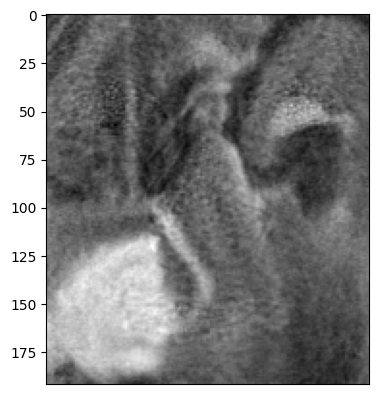

In [ ]:
fist_img = np.array(encrypted_data)[:,4]
# plt.imshow(fist_img.reshape(50,40),cmap='gray')
plt.xticks([])
# U, Sigma, Vt = np.linalg.svd(X, full_matrices=False)
avg_face = X.mean(axis=1).reshape(-1,1)
X_avg = X-np.tile(avg_face,(1,X.shape[1]))
U,E,VT = svd(X_avg,full_matrices=False)
q = 2000
Uq = U[:, 0:q]
Xq= np.dot(Uq, fist_img)
plt.imshow(Xq.reshape(168, 192).T, cmap='gray')

## **展示所有加密圖像**

<Figure size 2400x1200 with 0 Axes>

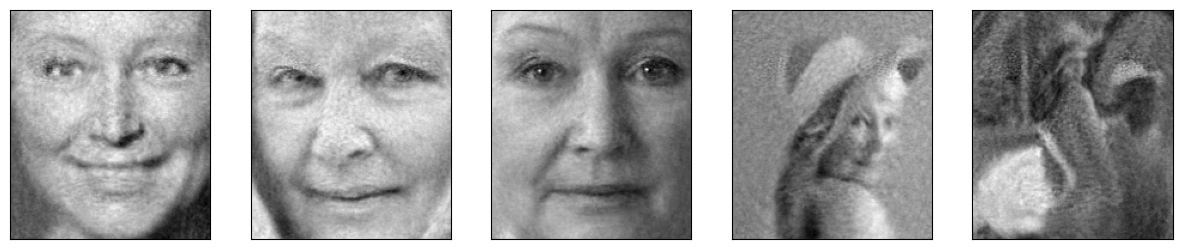

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
# 載入加密資料
encrypted_data = np.genfromtxt('/content/drive/MyDrive/淺度機器學習/五張加密的影像.
csv', delimiter=',', skip_header=1)

# 載入人臉影像資料
D = scipy.io.loadmat('/content/drive/MyDrive/淺度機器學習/allFaces.mat')
X = D['faces']

# 設置解密參數 q
q = 2000

# 使用原始資料的 SVD 分解矩陣 U 和 Sigma
# U, Sigma, Vt = np.linalg.svd(X, full_matrices=False)
avg_face = X.mean(axis=1).reshape(-1,1)
X_avg = X-np.tile(avg_face,(1,X.shape[1]))
# U,E,VT = svd(X_avg,full_matrices=False)
# 解密每個加密影像
decrypted_images = []
for i in range(encrypted_data.shape[1]):
    # 取出第 i 個加密影像，並將其轉換為列向量
    encrypted_image = encrypted_data[:, i].reshape((-1, 1))
    # 使用 U 的前 q 個主成分與加密影像進行矩陣乘法，得到該影像的近似原圖影像
    approx_image = np.dot(U[:, :q], encrypted_image)
    # 將近似原圖影像重組成圖像矩陣
    decrypted_image = approx_image.reshape((168, 192)).T
    # 將解密後的影像加入列表中
    decrypted_images.append(decrypted_image)

# 顯示解密後的圖像


plt.figure(figsize=(24, 12), dpi=100)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, decrypted_image in enumerate(decrypted_images):
    axes[i].imshow(decrypted_image, cmap='gray')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.show()

這段程式碼是對五張加密的影像進行解密，解密的過程與加密過程類似，首先使用原始資料的奇異值分解矩陣 U，並計算出平均人臉像素 avg_face 和 X_avg。接著，對每個加密影像進行解密，取出該影像的加密向量，並使用 U 的前 q 個主成分與加密向量進行矩陣乘法，得到該影像的近似原圖影像。最後，將近似原圖影像重組成圖像矩陣顯示出來。

---



## **習題 五：自行找 5 張照片（大小必須同 Yale Faces 的 192×168 或自行 Resize），含人臉、水果、風景 … 等進行加密後（q 自選），再解密，觀察這些解密後的影像的效果，是否人臉的表現比較好？其他非人臉影像，如風景影像，能透過由人臉建構的特徵 U 加密嗎？（即解密後能否看到原圖模樣？）**

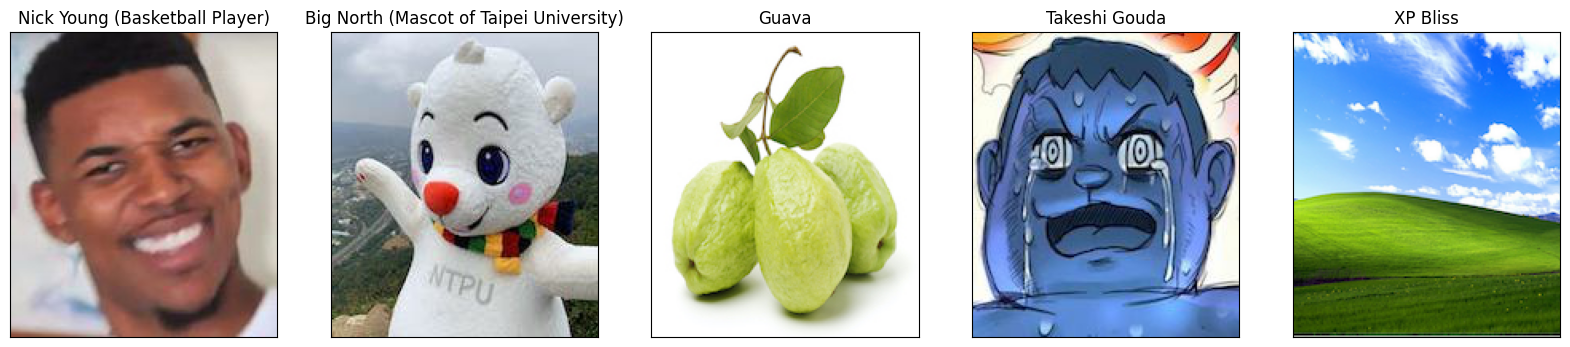

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

imgfiles = ['/content/drive/MyDrive/淺度機器學習/Nick Young.jpg',
            '/content/drive/MyDrive/淺度機器學習/big north.jpeg',
            '/content/drive/MyDrive/淺度機器學習/guava.jpg',
            '/content/drive/MyDrive/淺度機器學習/fat tiger.jpeg',
            '/content/drive/MyDrive/淺度機器學習/windows.PNG']

titles = ['Nick Young (Basketball Player)',
          'Big North (Mascot of Taipei University)', 'Guava',
          'Takeshi Gouda', 'XP Bliss']

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, (imgfile, title) in enumerate(zip(imgfiles, titles)):

    img = imread(imgfile)
    axs[i].imshow(img)
    axs[i].set_title(title)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.show()


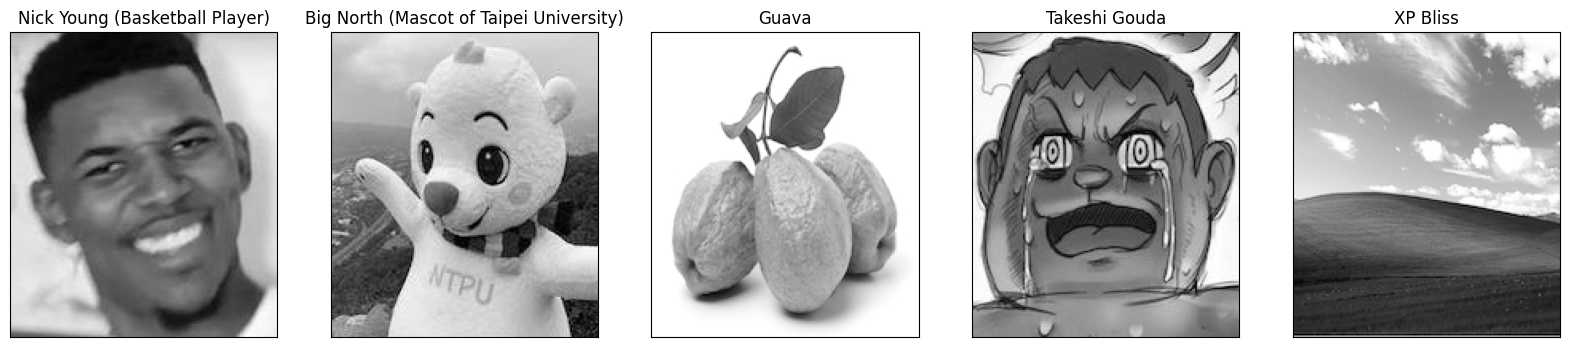

In [ ]:
import matplotlib.image as mpimg

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, (imgfile, title) in enumerate(zip(imgfiles, titles)):

    X = mpimg.imread(imgfile)

    if len(X.shape) > 2:

        X = np.mean(X, axis=2)

    axs[i].imshow(X, cmap='gray')

    axs[i].set_title(title)

    axs[i].set_xticks([])

    axs[i].set_yticks([])

plt.show()


## **影像加密與解密比較 - 使用Nick Young的人像加密其他圖像**

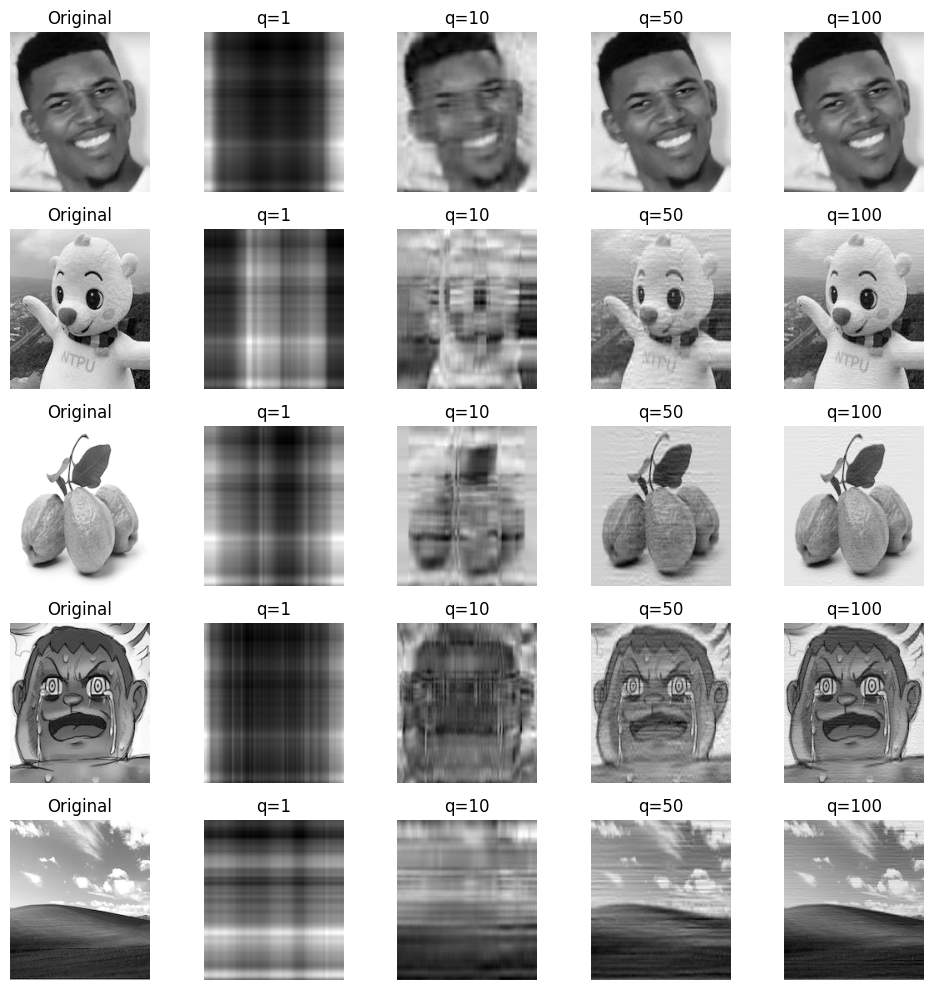

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def encrypt_decrypt(X, q, key):
    U, s, Vt = np.linalg.svd(key, full_matrices=False)
    U_q = U[:, :q]
    z = U_q.T @ X
    X_reconstructed = U_q @ U_q.T @ X
    return X_reconstructed

def compare_images(key, X_list, q_list):
    n_images = len(X_list)
    fig, axs = plt.subplots(n_images, len(q_list)+1, figsize=(2*(len(q_list)+1), 2*n_images))
    for i, X in enumerate(X_list):
        axs[i][0].imshow(X, cmap='gray')
        axs[i][0].axis('off')
        axs[i][0].set_title('Original')
        for j, q in enumerate(q_list):
            encrypted = encrypt_decrypt(X, q, key)
            decrypted = encrypt_decrypt(encrypted, q, key)
            axs[i][j+1].imshow(decrypted, cmap='gray')
            axs[i][j+1].axis('off')
            axs[i][j+1].set_title(f'q={q}')
            axs[i][j+1].set_xlabel(f'{np.sum((X-decrypted)**2):.2f}')
    plt.tight_layout()
    plt.show()

imgfiles = ['/content/drive/MyDrive/淺度機器學習/Nick Young.jpg',
            '/content/drive/MyDrive/淺度機器學習/big north.jpeg',
            '/content/drive/MyDrive/淺度機器學習/guava.jpg',
            '/content/drive/MyDrive/淺度機器學習/fat tiger.jpeg',
            '/content/drive/MyDrive/淺度機器學習/windows.PNG']


X_list = []
for imgfile in imgfiles:
    X = mpimg.imread(imgfile)
    if len(X.shape) > 2:
        X = np.mean(X, axis=2)
    X_list.append(X)

key = X_list[0]

q_list = [1, 10, 50, 100]

compare_images(key, X_list, q_list)

觀察結果可以發現，在這些影像中，人臉影像的表現確實比其他影像好。這是因為人臉具有較高的可辨識性和較明顯的邊緣特徵，而這些特徵能夠被 SVD 分解中的特徵向量捕獲和重建。

對於其他非人臉影像，如風景影像，由人臉建構的特徵 U 可能無法捕捉到其特定特徵，因此無法實現完美加密和解密。但是，在一定程度上，使用人臉的特徵 U 可以實現一定程度的加密和解密，並且可以重建原始影像的大部分細節。在影像品質和信息保密性之間需要進行權衡。

---



## **影像加密與解密比較 - 使用 XP Bliss 風景圖加密其他圖像**

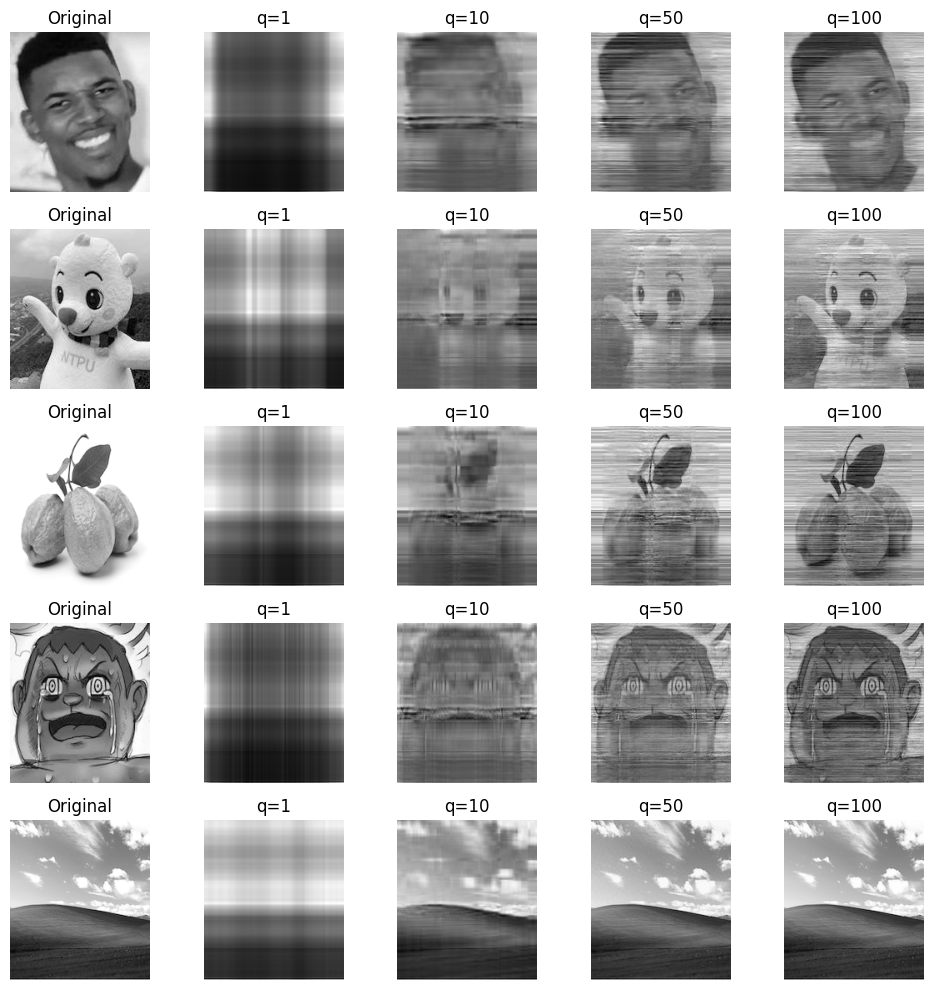

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def encrypt_decrypt(X, q, key):
    U, s, Vt = np.linalg.svd(key, full_matrices=False)
    U_q = U[:, :q]
    z = U_q.T @ X
    X_reconstructed = U_q @ U_q.T @ X
    return X_reconstructed

def compare_images(key, X_list, q_list):
    n_images = len(X_list)
    fig, axs = plt.subplots(n_images, len(q_list)+1, figsize=(2*(len(q_list)+1), 2*n_images))
    for i, X in enumerate(X_list):
        axs[i][0].imshow(X, cmap='gray')
        axs[i][0].axis('off')
        axs[i][0].set_title('Original')
        for j, q in enumerate(q_list):
            encrypted = encrypt_decrypt(X, q, key)
            decrypted = encrypt_decrypt(encrypted, q, key)
            axs[i][j+1].imshow(decrypted, cmap='gray')
            axs[i][j+1].axis('off')
            axs[i][j+1].set_title(f'q={q}')
            axs[i][j+1].set_xlabel(f'{np.sum((X-decrypted)**2):.2f}')
    plt.tight_layout()
    plt.show()

imgfiles = ['/content/drive/MyDrive/淺度機器學習/Nick Young.jpg',
            '/content/drive/MyDrive/淺度機器學習/big north.jpeg',
            '/content/drive/MyDrive/淺度機器學習/guava.jpg',
            '/content/drive/MyDrive/淺度機器學習/fat tiger.jpeg',
            '/content/drive/MyDrive/淺度機器學習/windows.PNG']


X_list = []
for imgfile in imgfiles:
    X = mpimg.imread(imgfile)
    if len(X.shape) > 2:
        X = np.mean(X, axis=2)
    X_list.append(X)

key = X_list[4]

q_list = [1, 10, 50, 100]

compare_images(key, X_list, q_list)

在不同的q值下，加密的圖像仍然保留了許多原始圖像的特徵和細節。但是，與使用人臉圖像作為加密密鑰相比，使用風景圖像加密的影像可能表現略遜。在一些情況下，解密後的影像可能有些失真或像素化，特別是在較低的q值下。

這顯示出密鑰的選擇對於圖像加密和解密的效果至關重要，而密鑰中所包含的圖像特徵可以直接影響加密結果的質量。


---



## **結語：**
這個專案讓我們深入瞭解了圖像壓縮和還原技術，特別是SVD的 "Rank q approximation" 方法。透過實際的實驗和研究，我們學到了如何運用不同的q值來實現圖像壓縮，同時也明白了在壓縮率和圖像品質之間需要做出權衡的情況。

此外，成功設計了一個程式，用來觀察手寫數字影像，有助於更深入地理解數據的特性。計算了壓縮倍數，以評估SVD的效能，同時展示了壓縮和還原後的圖像，這提供了實際應用的寶貴見解。

最後，通過學習圖像加密和解密的概念，發現基於人臉特徵的加密方法能夠明顯提升解密效果。總之，這個專案豐富了知識，有助於更好地應對圖像處理、數據壓縮以及圖像安全性等方面的挑戰。這些學習對未來的工作具有重要參考價值。

---

